In [1]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\samee\Data Science YHills\titanic-training-data.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

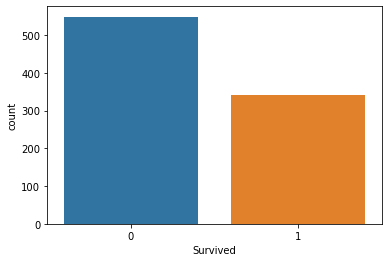

In [8]:
sns.countplot(x="Survived",data=data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

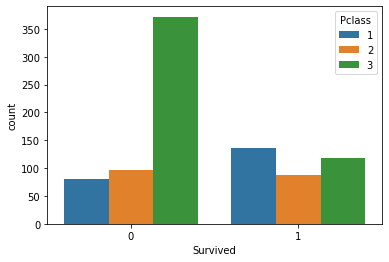

In [9]:
sns.countplot(x="Survived",hue="Pclass",data=data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

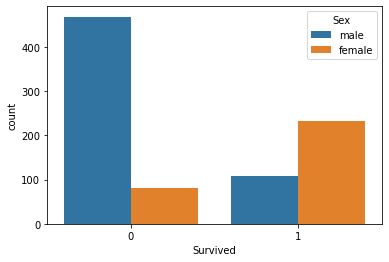

In [10]:
sns.countplot(x="Survived",hue="Sex",data=data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

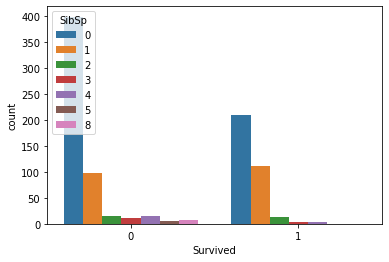

In [11]:
sns.countplot(x="Survived",hue="SibSp",data=data)

In [12]:
data = data.drop('Cabin',axis=1)

In [13]:
data = data.drop('Name',axis=1)

In [14]:
data = data.drop('PassengerId',axis=1)

In [15]:
data = data.drop('Fare',axis=1)

In [16]:
data = data.drop('Ticket',axis=1)

In [17]:
mean1=data['Age'].mean()
mean1

29.69911764705882

In [18]:
median1=data['Age'].median()
median1

28.0

In [19]:
data["Age"].replace(np.nan,mean1,inplace=True)

In [20]:
mode=data['Embarked'].mode().values[0]
mode

'S'

In [21]:
data["Embarked"].replace(np.nan,mode,inplace=True)

In [22]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [23]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Embarked     object
dtype: object

In [24]:
data=pd.get_dummies(data,columns=["Sex","Embarked","Pclass"])

In [25]:
data.head()

,Survived,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,0,1,0,0,1,0,0,1
1,1,38.0,1,0,1,0,1,0,0,1,0,0
2,1,26.0,0,0,1,0,0,0,1,0,0,1
3,1,35.0,1,0,1,0,0,0,1,1,0,0
4,0,35.0,0,0,0,1,0,0,1,0,0,1


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Sex_female  891 non-null    uint8  
 5   Sex_male    891 non-null    uint8  
 6   Embarked_C  891 non-null    uint8  
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
 9   Pclass_1    891 non-null    uint8  
 10  Pclass_2    891 non-null    uint8  
 11  Pclass_3    891 non-null    uint8  
dtypes: float64(1), int64(3), uint8(8)
memory usage: 34.9 KB


### Logisitic Regression Model

In [27]:
X=data.drop("Survived",axis=1)
Y=data["Survived"]

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.30, random_state=42)

In [29]:
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [30]:
model.score(X_train, Y_train)

0.8041733547351525

In [31]:
model.score(X_test, Y_test)

0.8097014925373134

In [32]:
predictions=model.predict(X_test)

### Metrics Classification

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,predictions)

0.8097014925373134

In [34]:
from sklearn import metrics

<AxesSubplot:>

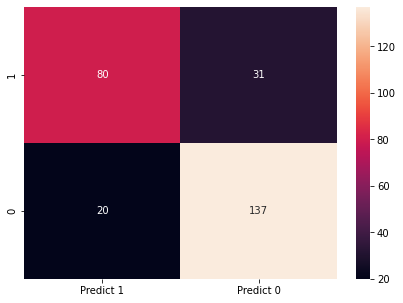

In [35]:
cm = metrics.confusion_matrix(Y_test,predictions,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in["1","0"]],
                  columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [36]:
from sklearn import metrics
print(metrics.classification_report(Y_test, predictions))  

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       157
           1       0.80      0.72      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



### DecisionTree

In [37]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(X_train,Y_train)
print(model2.score(X_train,Y_train))
print(model2.score(X_test,Y_test))

In [38]:
model2=DecisionTreeClassifier()
model2.fit(X_train,Y_train)
print(model2.score(X_train,Y_train))
print(model2.score(X_test,Y_test))

0.9454253611556982
0.7388059701492538


In [39]:
#As above is giving overfitting
model2_reg=DecisionTreeClassifier(max_depth=3,criterion='entropy')
model2_reg.fit(X_train,Y_train)
print(model2_reg.score(X_train,Y_train))
print(model2_reg.score(X_test,Y_test))

0.8378812199036918
0.7985074626865671


### Bagging Classifier

In [40]:
from sklearn.ensemble import BaggingClassifier

In [41]:
model_bag=BaggingClassifier()
model_bag.fit(X_train,Y_train)
print(model_bag.score(X_train,Y_train))
print(model_bag.score(X_test,Y_test))

0.9325842696629213
0.7835820895522388


In [42]:
#As above is giving overfitting
model_bag=BaggingClassifier(n_estimators=40,base_estimator=model2_reg)
model_bag.fit(X_train,Y_train)
print(model_bag.score(X_train,Y_train))
print(model_bag.score(X_test,Y_test))

0.8378812199036918
0.8059701492537313


### BoostingClassifier

#### > AdaBoostClassifier

In [43]:
from sklearn.ensemble import AdaBoostClassifier

In [44]:
model_boost=AdaBoostClassifier()
model_boost.fit(X_train,Y_train)
print(model_boost.score(X_train,Y_train))
print(model_boost.score(X_test,Y_test))

0.8362760834670947
0.8134328358208955


#### > GradientBoostingClassifier

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
model_Gboost=GradientBoostingClassifier()
model_Gboost.fit(X_train,Y_train)
print(model_Gboost.score(X_train,Y_train))
print(model_Gboost.score(X_test,Y_test))

0.8828250401284109
0.8059701492537313


In [47]:
model_Gboost=GradientBoostingClassifier(max_depth=3,n_estimators=10)
model_Gboost.fit(X_train,Y_train)
print(model_Gboost.score(X_train,Y_train))
print(model_Gboost.score(X_test,Y_test))

0.8378812199036918
0.8059701492537313


### RandomForest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
model_rf=RandomForestClassifier(max_depth=3,max_features=4)
model_rf.fit(X_train,Y_train)
print(model_rf.score(X_train,Y_train))
print(model_rf.score(X_test,Y_test))

0.8378812199036918
0.8134328358208955


### SVM

In [53]:
from sklearn.svm import SVC

In [58]:
model_svm=SVC(kernel='rbf',C=3.0,gamma='scale')
model_svm.fit(X_train,Y_train)
print(model_svm.score(X_train,Y_train))
print(model_svm.score(X_test,Y_test))

0.7913322632423756
0.7649253731343284
